**instructor** : Weilin Li

**student** : Raja 

**course** : Data Mining Applications

**date** : o4-22-2023

**What did you do with the data in the context of exploration?**

In the context of exploration, The notebook begins by importing the necessary libraries and loading the dataset. It then performs basic data cleaning and preprocessing, including checking for missing values and data types.

Next, the notebook performs EDA and data visualization, including descriptive statistics, a correlation heatmap, histograms, and boxplots. The notebook also explores relationships between various features and the target variable, which is whether or not a patient has heart disease.

Overall, the notebook provides a good introduction to EDA and data visualization techniques using Python and Pandas, and is a useful resource for anyone interested in exploring this dataset or learning about EDA more generally.


Importing Libraries

In [1]:
#Data Handling
import numpy as np 
import pandas as pd 

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
import graphviz

#Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


Reading Dataset 


In [2]:
df=pd.read_csv('/content/heart (1).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Was there missing data? Duplications? How clean was the data?**

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

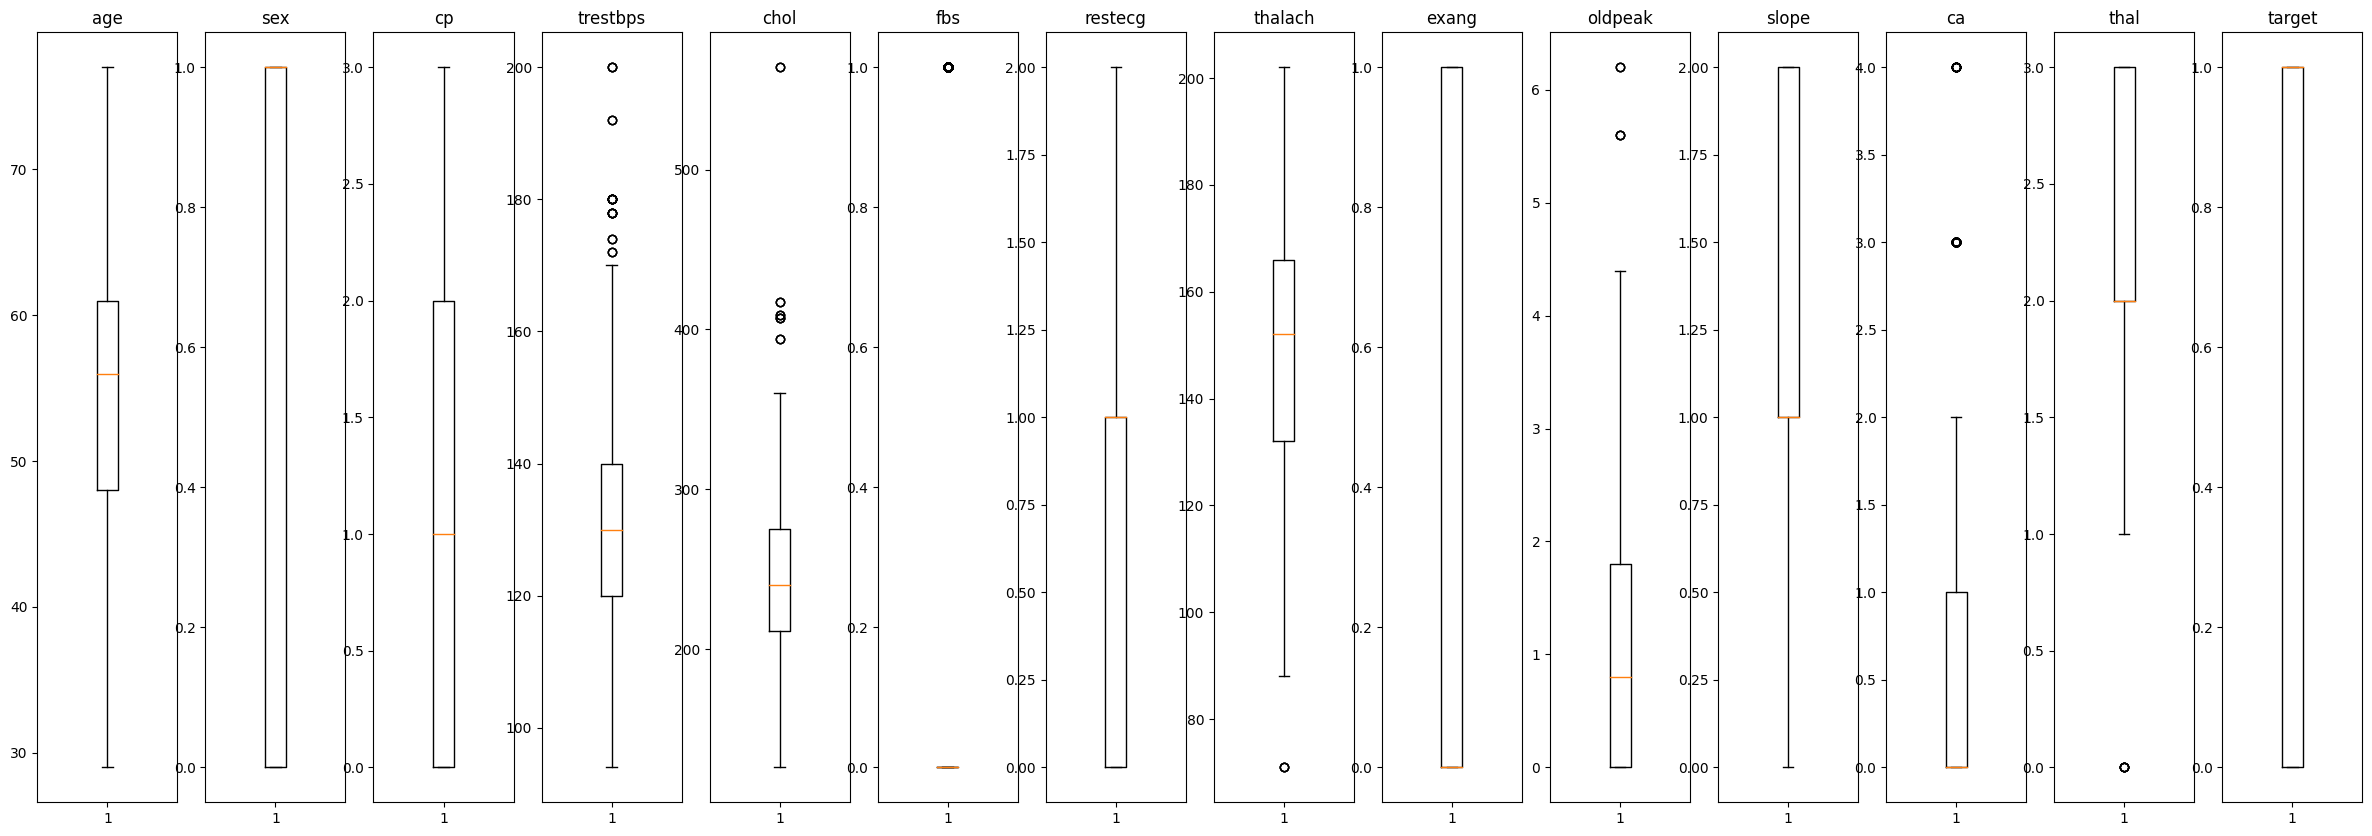

In [4]:
# create a figure and axis for each column
fig, axs = plt.subplots(ncols=len(df.columns), figsize=(30,10))

# loop through each column and draw a box plot
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)

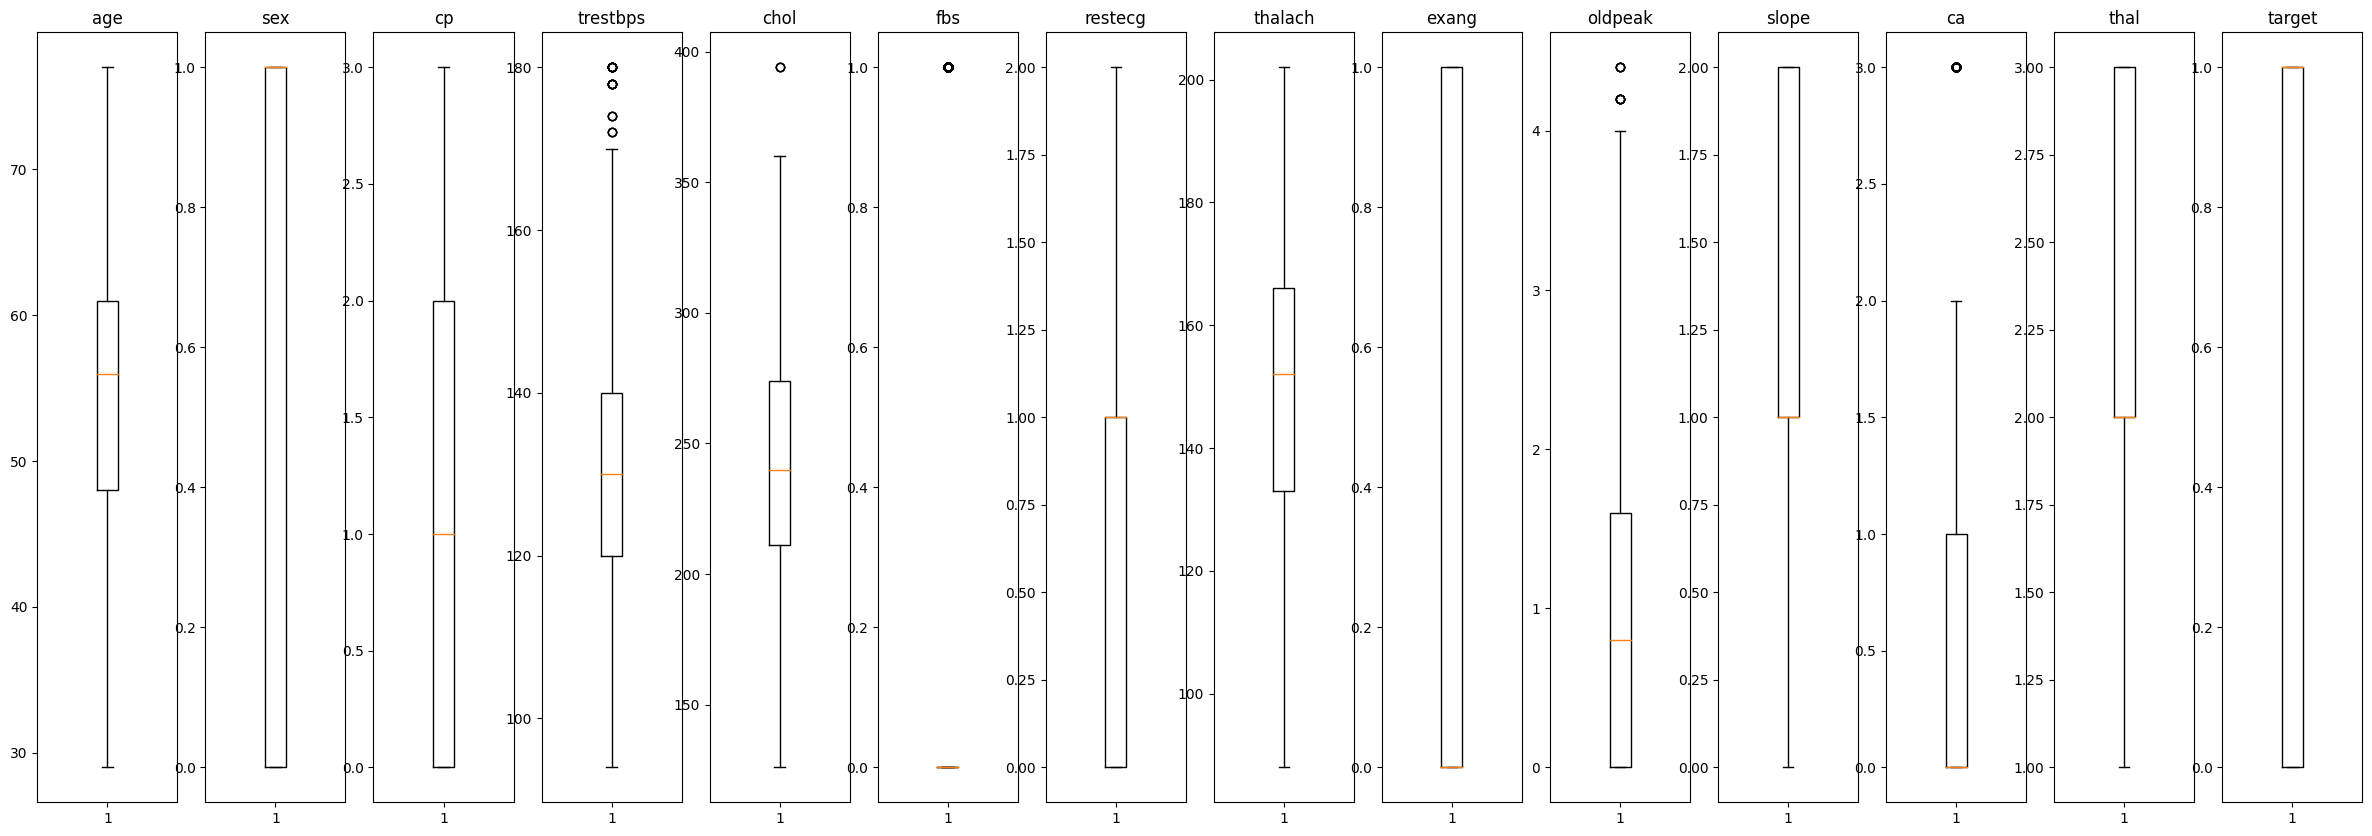

In [5]:
# Using z-score to remove outliers

# Loop over all columns in the dataset
for column in df.columns:
    # Compute the Z-score for each data point in the column
    z = np.abs((df[column] - df[column].mean()) / df[column].std())

    # Identify the data points that have a Z-score greater than a certain threshold
    threshold = 3
    outliers = df[z > threshold][column]

    # Replace the outliers with the median value of the column
    df.loc[z > threshold, column] = df[column].median()

# create a figure and axis for each column
fig, axs = plt.subplots(ncols=len(df.columns), figsize=(30,10))

# loop through each column and draw a box plot
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)

**What did you do to clean the data?**

i checked for null values, used z-score to eliminate outliers

Dataset Information


In [6]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# --- Fixing Data Types ---
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[lst] = df[lst].astype(object)

**How many entries are in the dataset?**


In [8]:
df.shape

(1025, 14)

2. Exploratory Data Analysis


Categorical Data Visulization


Sex (GENDER)



 Sex (Gender) Total 



1    713
0    312
Name: sex, dtype: int64

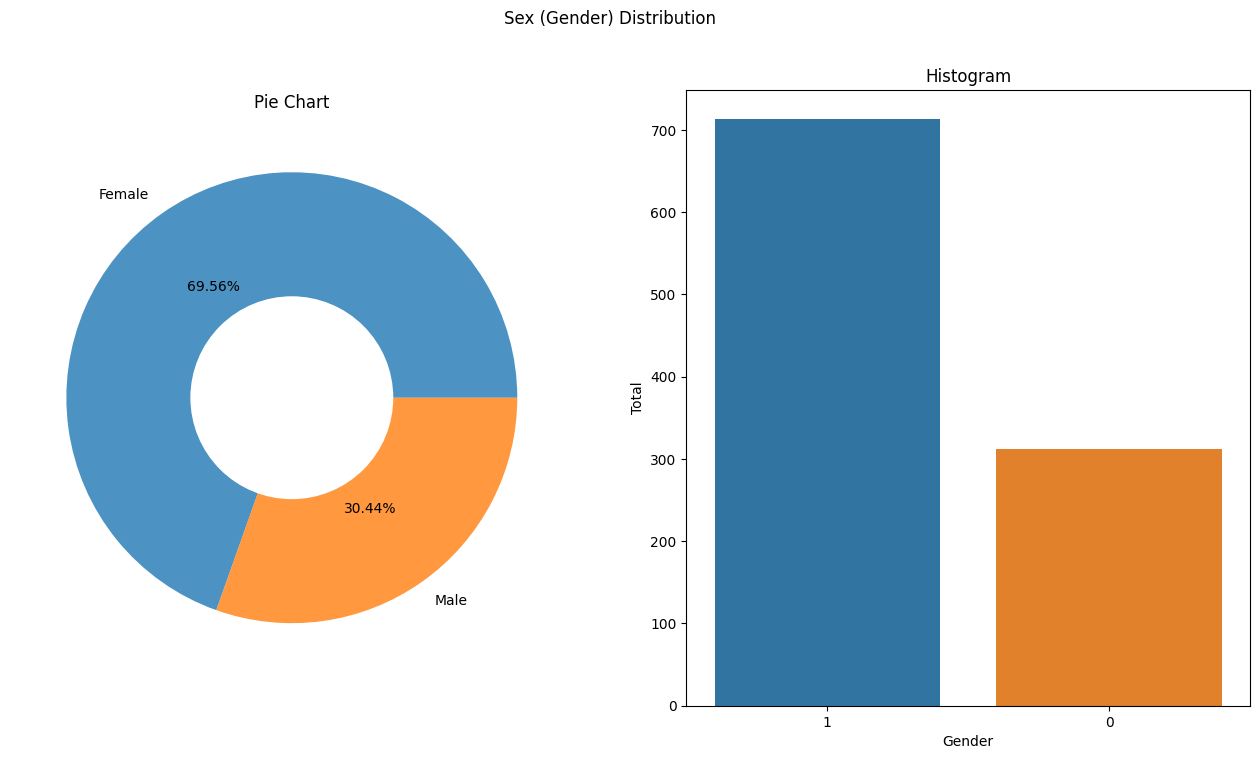

In [9]:
labels=['Female', 'Male']
order=df['sex'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Sex (Gender) Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['sex'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='sex',data=df,order=order)
plt.xlabel('Gender')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Sex (Gender) Total \n')
df.sex.value_counts(dropna=False)
# print()

cp (Chest Pain Type)


 Chest Pain Type Total 



1    713
0    312
Name: sex, dtype: int64

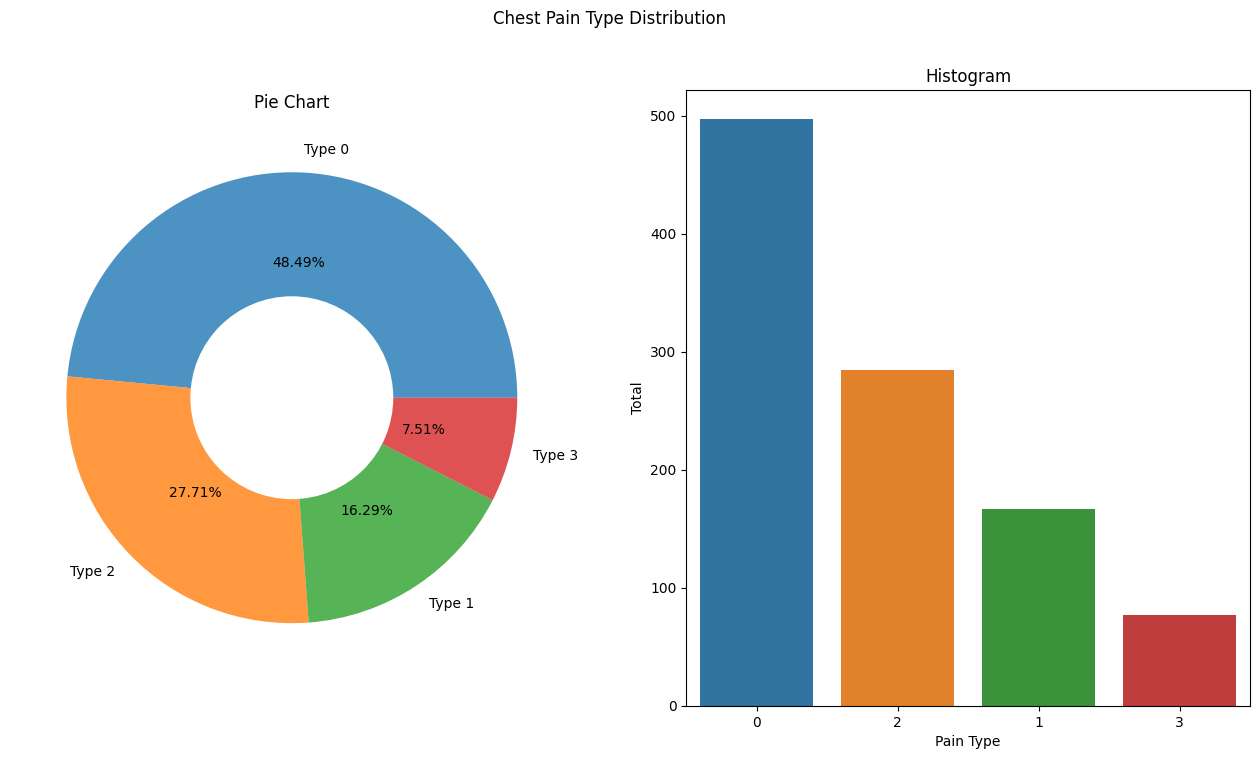

In [10]:
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=df['cp'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Chest Pain Type Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['cp'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='cp',data=df,order=order)
plt.xlabel('Pain Type')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Chest Pain Type Total \n')
df.sex.value_counts(dropna=False)
# print()

Fasting Blood Sugar



 Fasting BLood Sugar Total 



1    713
0    312
Name: sex, dtype: int64

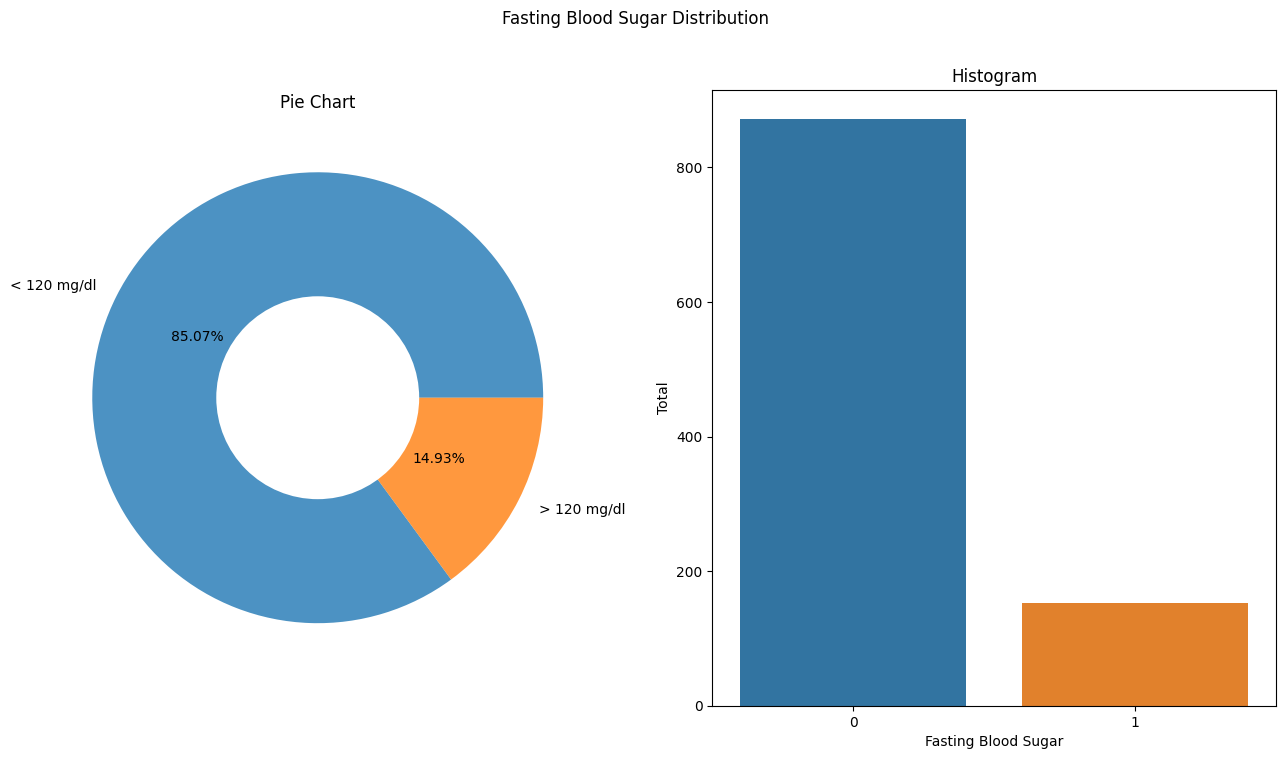

In [11]:
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df['fbs'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Fasting Blood Sugar Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['fbs'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='fbs',data=df,order=order)
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Fasting BLood Sugar Total \n')
df.sex.value_counts(dropna=False)
# print()

restecg (Resting Electrocardiographic Results)



 Resting Electrocardiographic Results Total 



1    713
0    312
Name: sex, dtype: int64

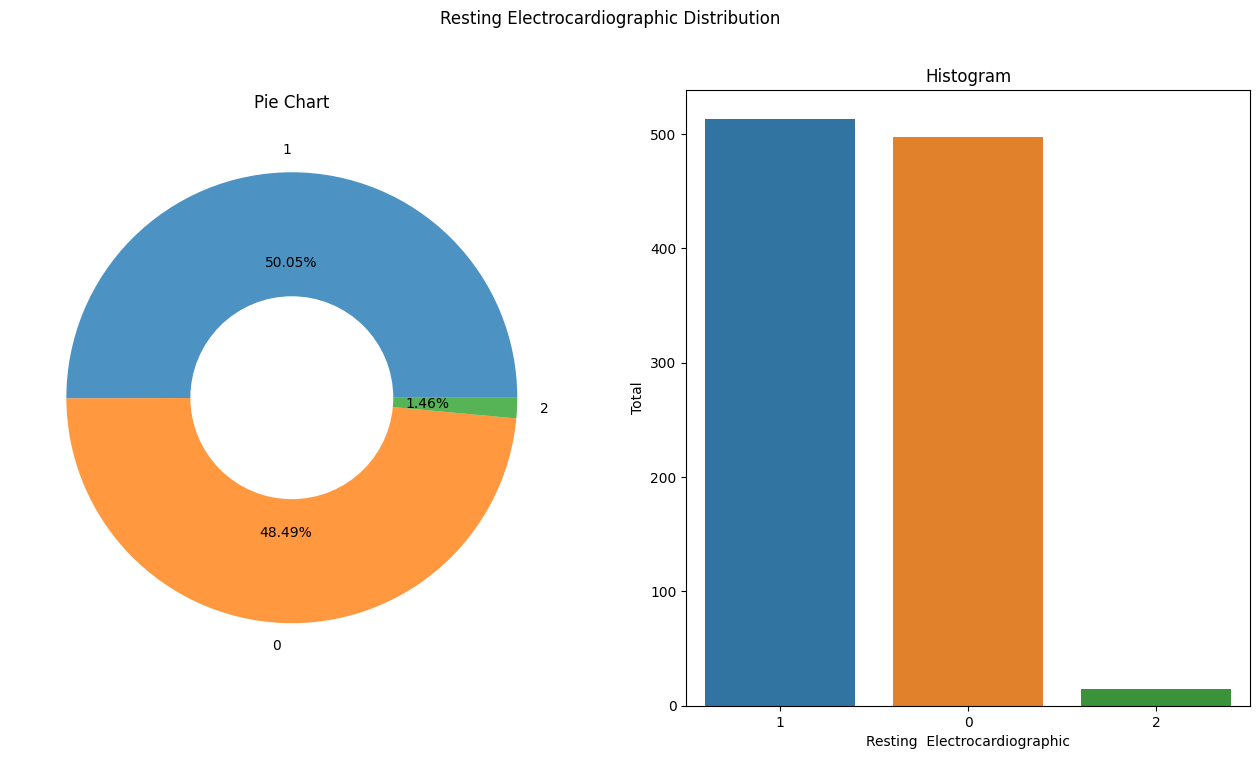

In [12]:
labels=['1', '0', '2']
order=df['restecg'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Resting Electrocardiographic Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['restecg'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='restecg',data=df,order=order)
plt.xlabel('Resting  Electrocardiographic')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Resting Electrocardiographic Results Total \n')
df.sex.value_counts(dropna=False)
# print()

exang (Exercise Induced Angina)



 Exercise Induced Angina Total 



1    713
0    312
Name: sex, dtype: int64

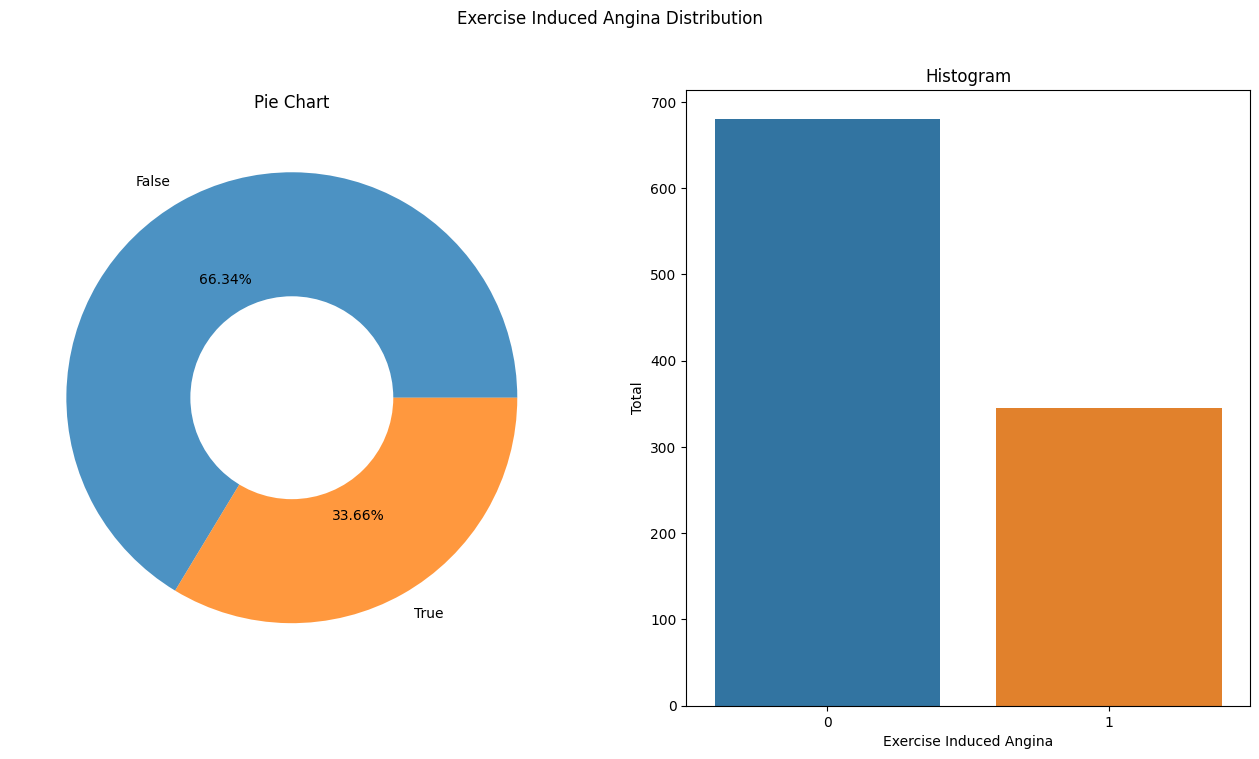

In [13]:
labels=['False', 'True']
order=df['exang'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Exercise Induced Angina Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['exang'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='exang',data=df,order=order)
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Exercise Induced Angina Total \n')
df.sex.value_counts(dropna=False)
# print()

slope (Slope of the Peak Exercise)



 Slope Total 



1    713
0    312
Name: sex, dtype: int64

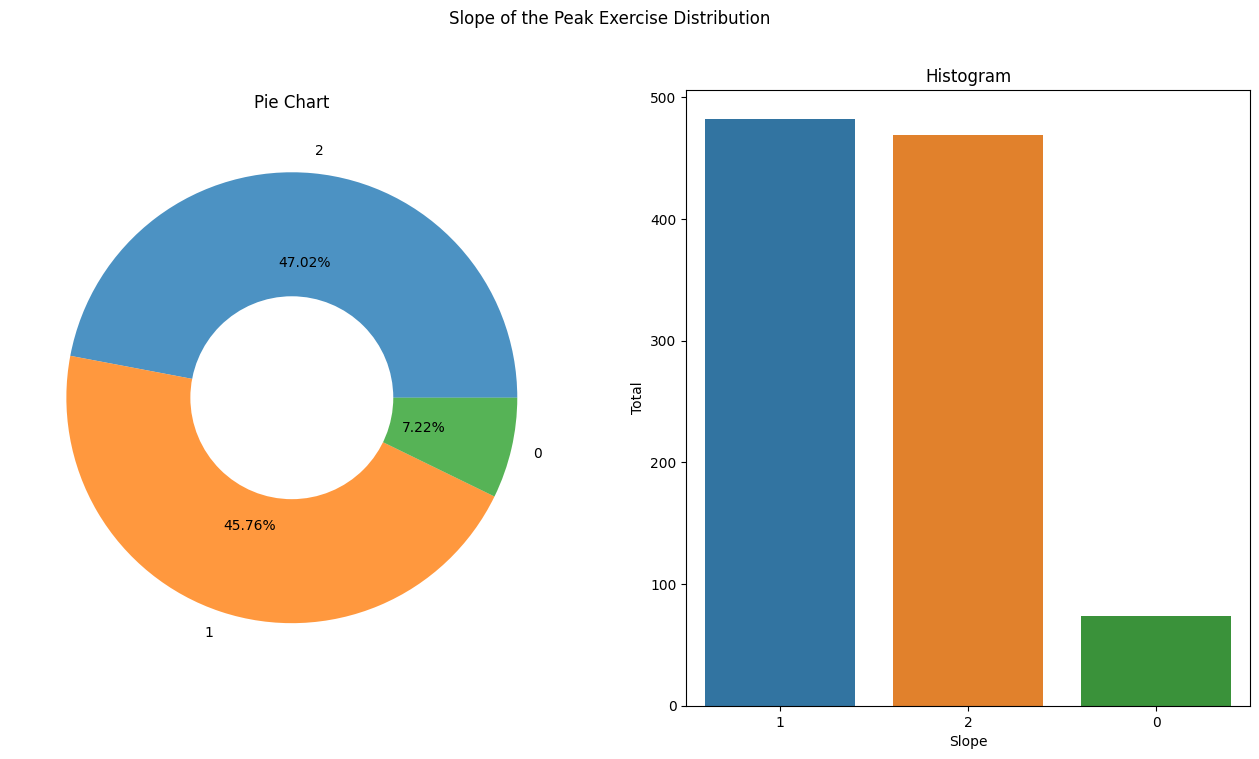

In [14]:
labels=['2', '1', '0']
order=df['slope'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Slope of the Peak Exercise Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['slope'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='slope',data=df,order=order)
plt.xlabel('Slope')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Slope Total \n')
df.sex.value_counts(dropna=False)
# print()

ca (Number of Major Vessels)



 Number of Major Vessels Total  

0    596
1    226
2    134
3     69
Name: ca, dtype: int64


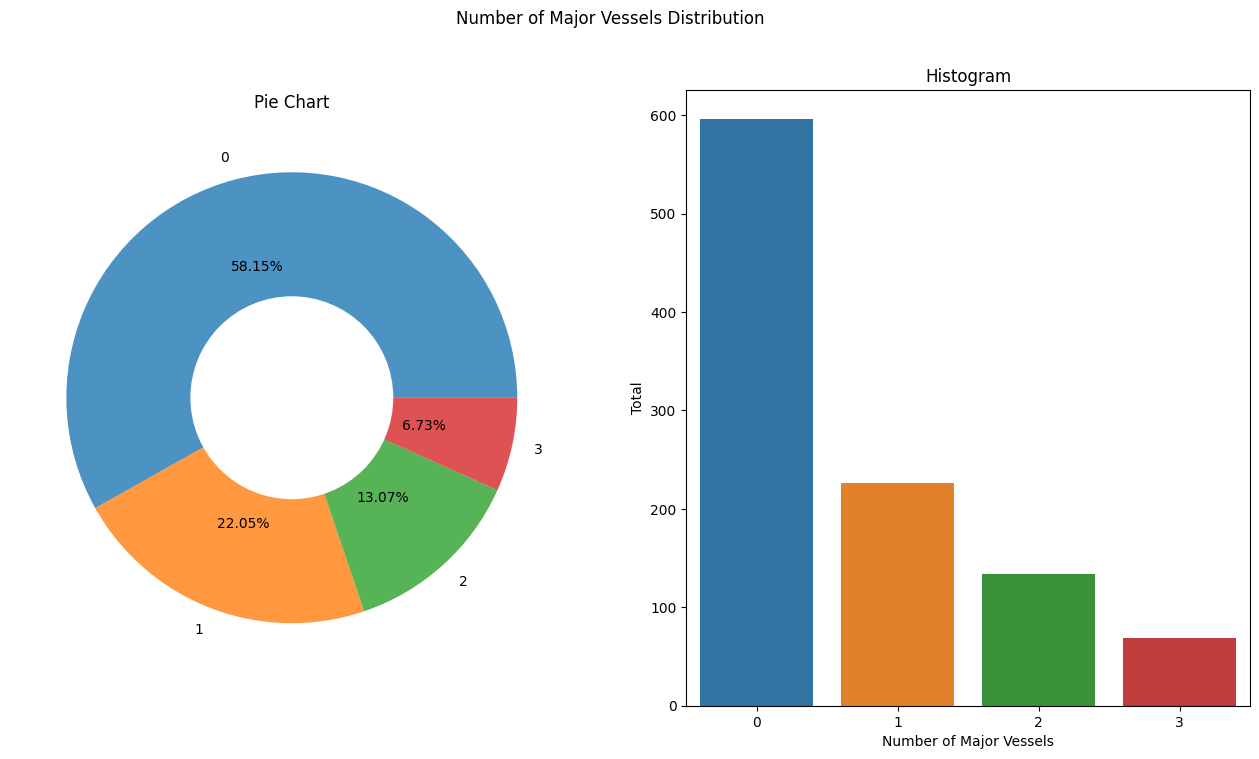

In [15]:
# Get the unique values and their counts in the 'ca' column
ca_counts = df['ca'].value_counts()
ca_labels = ca_counts.index.tolist()

# Size for Both Figures
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Distribution')

# Subplot 1 Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart')
plt.pie(ca_counts, labels=ca_labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre = plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# Subplot 2 Histogram
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram')
ax = sns.countplot(x='ca', data=df, order=ca_labels)
plt.xlabel('Number of Major Vessels')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Number of Major Vessels Total  \n')
print(df.ca.value_counts(dropna=False))

thal


 "thal" Total  



2    551
3    410
1     64
Name: thal, dtype: int64

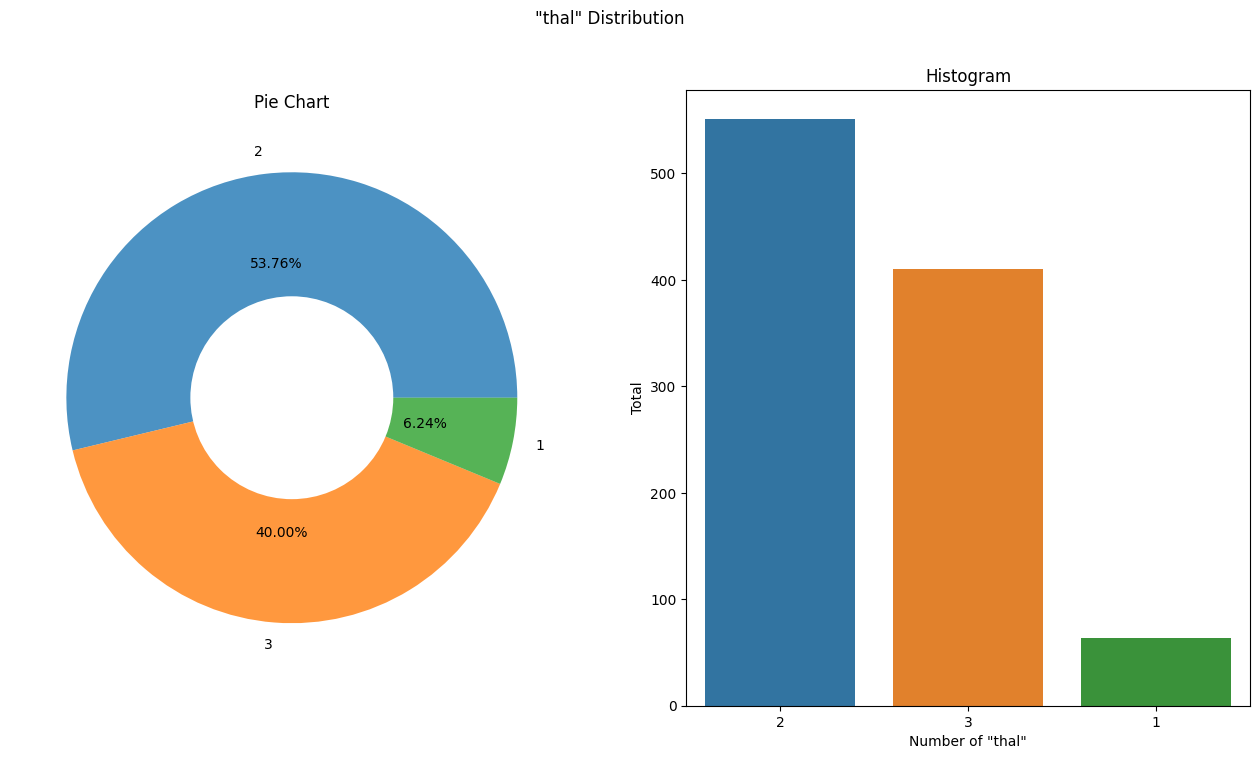

In [16]:
# Labels for Pie Chart
labels = df['thal'].value_counts().index.tolist()

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('"thal" Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['thal'].value_counts(), labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax = sns.countplot(x='thal', data=df, order=labels)
plt.xlabel('Number of "thal"')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n "thal" Total  \n')
df.thal.value_counts(dropna=False)


target (Heart Diseases Status)


 Heart Diseases Status (target) Total 



1    713
0    312
Name: sex, dtype: int64

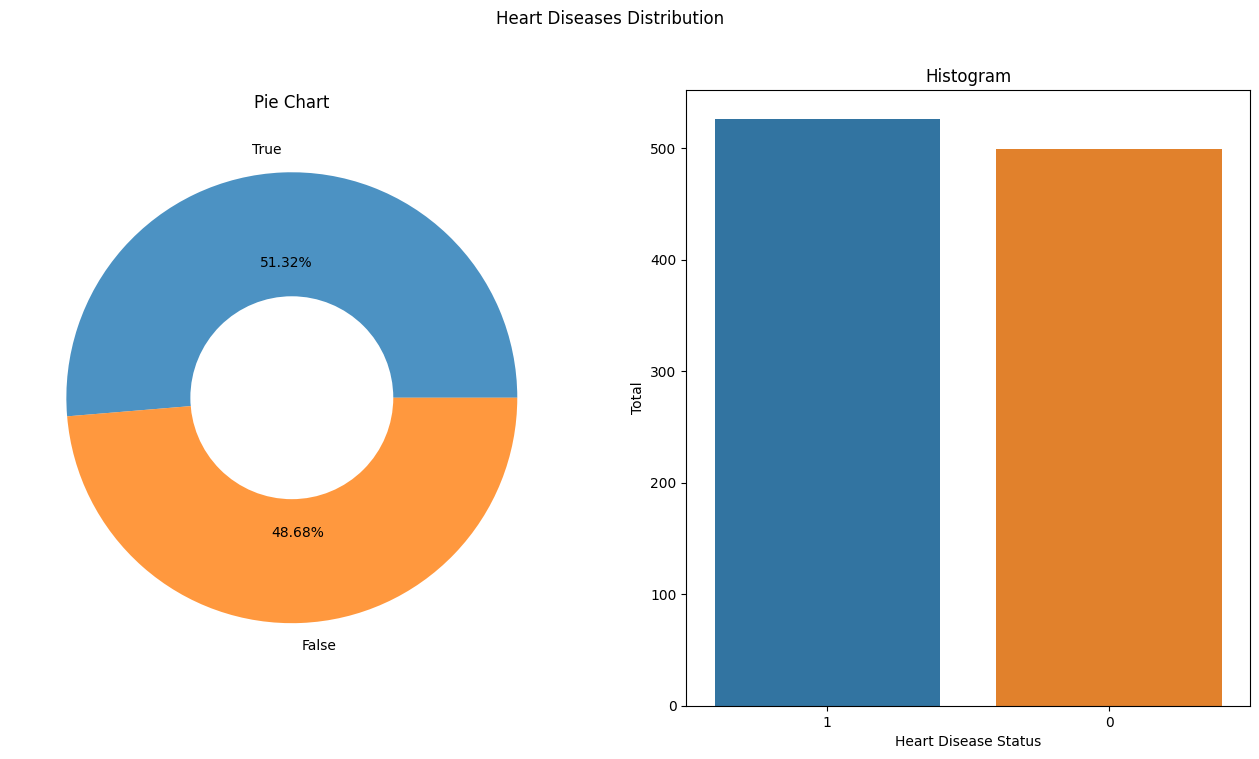

In [17]:
labels=['True', 'False']
order=df['target'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Heart Diseases Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['target'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='target',data=df,order=order)
plt.xlabel('Heart Disease Status')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Heart Diseases Status (target) Total \n')
df.sex.value_counts(dropna=False)
# print()

Heart Disease Distribution Based on Gender


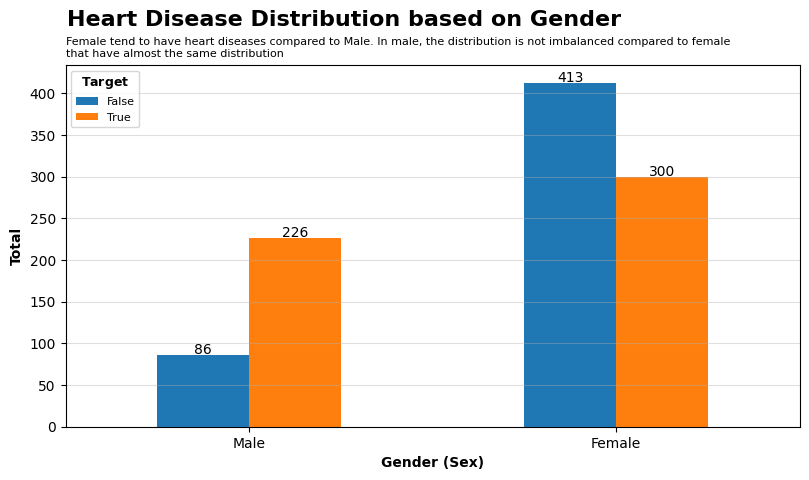

In [18]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']


# --- Creating Bar Chart ---
ax = pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(8, 5))


# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.title('Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female\nthat have almost the same distribution', 
          fontsize='8', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

Heart Disease Distribution Based on Major Vessels Total


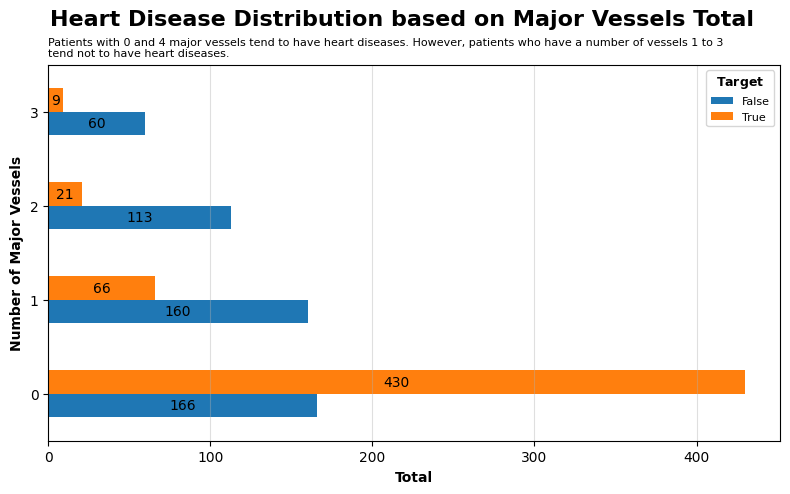

In [19]:
# --- Labels Settings ---
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(df.ca, df.target).plot(kind='barh', figsize=(8, 5))

# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold')

plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

Heart Disease Scatter Plot Based on Age


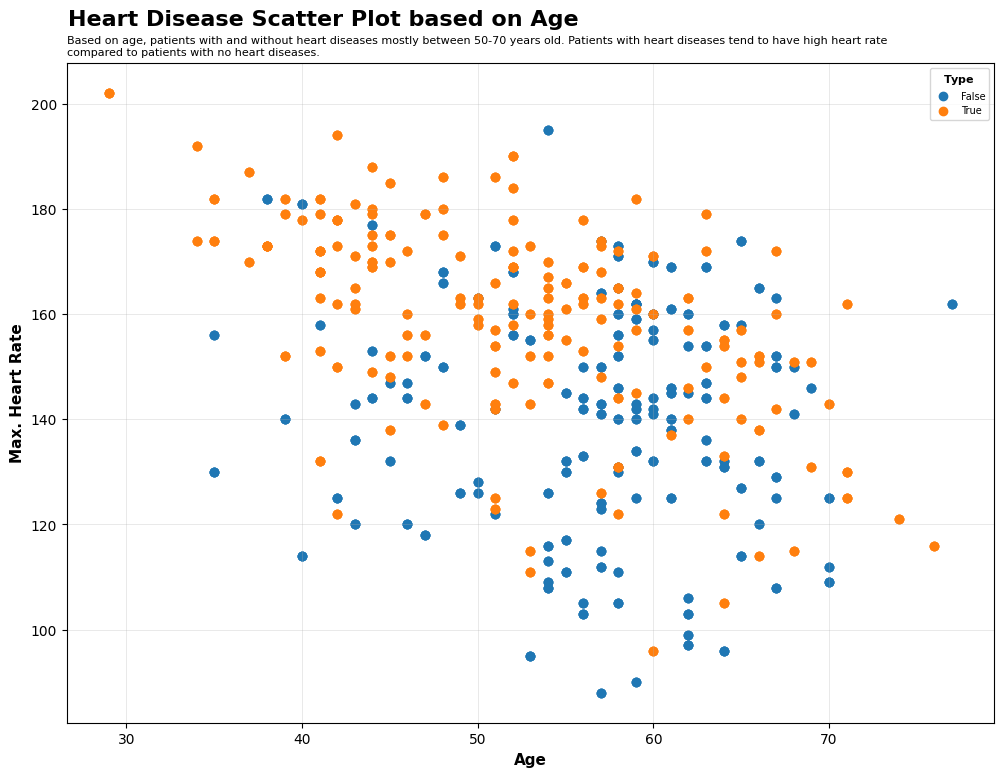

In [20]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.title('Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)

plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif')

plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif')

plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

Heart Disease Distribution Based on Fasting Blood Sugar


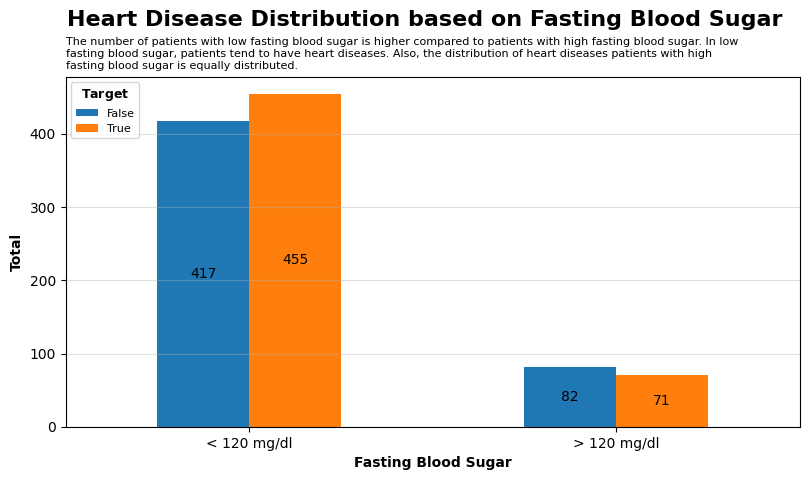

In [21]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['< 120 mg/dl', '> 120 mg/dl']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(8, 5))

# --- Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(height), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Fasting Blood Sugar', 
             fontweight='heavy', x=0.065, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')

plt.title('The number of patients with low fasting blood sugar is higher compared to patients with high fasting blood sugar. In low\nfasting blood sugar, patients tend to have heart diseases. Also, the distribution of heart diseases patients with high\nfasting blood sugar is equally distributed.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])

plt.xlabel('Fasting Blood Sugar', fontfamily='sans-serif', fontweight='bold')

plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')

plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

Heatmap

<ipython-input-22-19e28110c989>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)


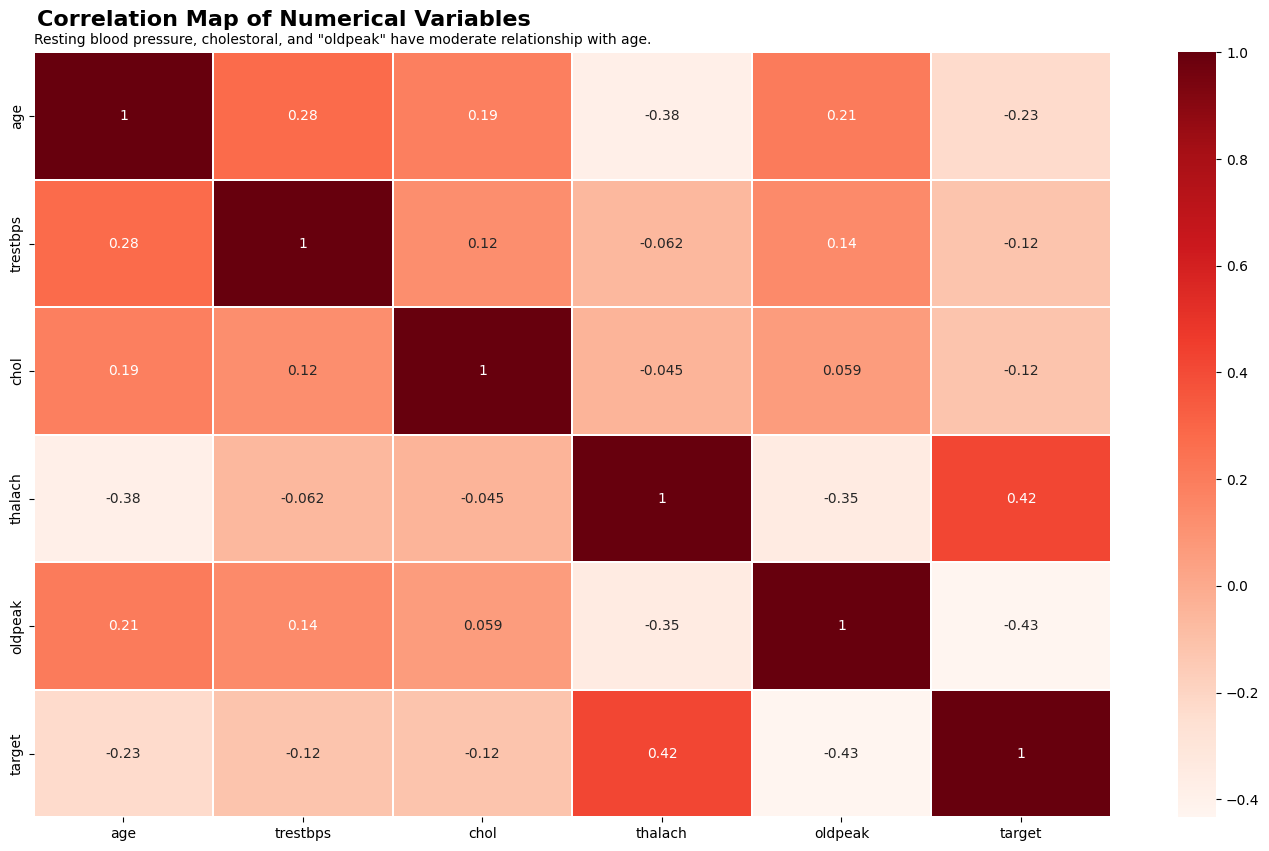

In [22]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))

sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)

plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

Data Preprocessing

One-Hot Encoding

In [23]:
# categorical columns
cp = pd.get_dummies(df['cp'],prefix= 'cp')
thal = pd.get_dummies(df['thal'],prefix = 'thal')
slope = pd.get_dummies(df['slope'],prefix = 'slope')

#merge dummy variables to main data frame
frames = [ df,cp,thal,slope]
df = pd.concat(frames,axis=1)

#Dropping the unnecessory variables
df=df.drop(columns = ['cp','thal','slope'])
df.head()

<ipython-input-23-19fdb6dbc7e9>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cp = pd.get_dummies(df['cp'],prefix= 'cp')
<ipython-input-23-19fdb6dbc7e9>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  thal = pd.get_dummies(df['thal'],prefix = 'thal')
<ipython-input-23-19fdb6dbc7e9>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  slope = pd.get_dummies(df['slope'],prefix = 'slope')


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_0,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,1,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,1,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,1,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,1,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,1,0,0,0,0,1,0,0,1,0


In [24]:
#Missing values
df.isnull().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
ca          0
target      0
cp_0        0
cp_1        0
cp_2        0
cp_3        0
thal_1      0
thal_2      0
thal_3      0
slope_0     0
slope_1     0
slope_2     0
dtype: int64

Separating Target Variable

In [25]:
#Declaring Dependent and Independent variables
X = df.drop(['target'],axis=1)
y = df['target']

Data Normalization

In [26]:
X = MinMaxScaler().fit_transform(X)

Splitting Training and Testing Dataset

In [27]:
#Splitting x and y into training and testing datasets

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=4)

**What did you find? What intrigued you about the data? Why does that matter?**

The dataset contains 1025 instances and 14 columns, including both categorical and numerical data. The target variable is whether or not a patient has heart disease. The dataset has no missing values and most of the features have the expected data types. The correlation heatmap shows that some of the features have a relatively high correlation with the target variable, such as chest pain type, maximum heart rate achieved, and the presence of an ST segment. The boxplots and histograms reveal that some features have outliers and skewed distributions, which could have an impact on the analysis and modeling. What intrigued me about the data is the potential to use it for predictive modeling and to develop algorithms that can accurately predict whether or not a patient has heart disease. This is important because heart disease is a major cause of morbidity and mortality worldwide, and accurate prediction and early diagnosis can improve outcomes and save lives.

Overall, this dataset is a valuable resource for researchers and practitioners in the field of cardiology, and has the potential to lead to new insights and improved treatment and prevention strategies for heart disease.

**What would your proposed next steps be?**

my proposed next steps would be:

Feature Selection: We can use feature importance techniques or correlation analysis to identify the most relevant features for predicting heart disease. This step can help us identify and focus on the most important factors affecting heart disease.

Model Building: We can build different classification models such as Logistic Regression, Random Forest, or Support Vector Machine (SVM), and evaluate their performance using appropriate metrics such as accuracy, precision, recall, and F1-score.

Model Tuning: We can improve the performance of the selected model by tuning the hyperparameters using techniques such as GridSearchCV or RandomizedSearchCV.

Model Deployment: Once we have selected the best model and tuned its hyperparameters, we can deploy the model in a production environment, where it can be used to predict heart disease in new patients.

**What business questions do you plan to answer with your data mining?**

Based on the dataset, some potential business questions that can be answered with data mining for heart disease prediction include:

Which features have the highest predictive power for heart disease?
How accurate can we predict the presence of heart disease based on these features?
What are the most significant risk factors associated with heart disease?
Can we identify any patterns or trends in the data that could help us better understand heart disease?
How can we use this information to develop more effective prevention and treatment strategies for heart disease?
Answering these questions could provide valuable insights for healthcare providers, insurance companies, and policymakers, which could ultimately lead to better patient outcomes and reduced healthcare costs.